In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy


In [2]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 594


In [4]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    print()
    city_url = "q=%s&appid=82b8faf7c4e4c08929c301dc90958c96"%(city)
#     print(city_url)
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
#         print(url+ city_url)
        city_weather = json.loads(requests.get(url + city_url).text)
        

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        #Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
        

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------

Processing Record 1 of Set 1 | touros

Processing Record 2 of Set 1 | peace river

Processing Record 3 of Set 1 | nemuro

Processing Record 4 of Set 1 | marsaskala
City not found. Skipping...

Processing Record 5 of Set 1 | auki

Processing Record 6 of Set 1 | nikolayevsk-on-amure

Processing Record 7 of Set 1 | ribeira grande

Processing Record 8 of Set 1 | edinburgh of the seven seas

Processing Record 9 of Set 1 | blackmans bay

Processing Record 10 of Set 1 | golere

Processing Record 11 of Set 1 | iskateley

Processing Record 12 of Set 1 | taiohae
City not found. Skipping...

Processing Record 13 of Set 1 | utrik

Processing Record 14 of Set 1 | moranbah

Processing Record 15 of Set 1 | enewetak

Processing Record 16 of Set 1 | ushuaia

Processing Record 17 of Set 1 | remire-montjoly

Processing Record 18 of Set 1 | taoudenni

Processing Record 19 of Set 1 | riverton

Processing Record 20 of Set 1 | bilibino

Processing 


Processing Record 32 of Set 4 | treinta y tres

Processing Record 33 of Set 4 | wailua homesteads

Processing Record 34 of Set 4 | beinamar

Processing Record 35 of Set 4 | okha

Processing Record 36 of Set 4 | seaton delaval

Processing Record 37 of Set 4 | cannonvale

Processing Record 38 of Set 4 | lompoc

Processing Record 39 of Set 4 | brezice

Processing Record 40 of Set 4 | bagan serai

Processing Record 41 of Set 4 | anadyr

Processing Record 42 of Set 4 | port saint john's

Processing Record 43 of Set 4 | yumbel

Processing Record 44 of Set 4 | sisimiut

Processing Record 45 of Set 4 | ust-nera

Processing Record 46 of Set 4 | sabzevar

Processing Record 47 of Set 4 | murun-kuren

Processing Record 48 of Set 4 | copperas cove

Processing Record 49 of Set 4 | mukalla

Processing Record 0 of Set 5 | walvis bay

Processing Record 1 of Set 5 | pago pago

Processing Record 2 of Set 5 | nadym

Processing Record 3 of Set 5 | san antonio de pale

Processing Record 4 of Set 5 | kapa'a


Processing Record 19 of Set 8 | essaouira

Processing Record 20 of Set 8 | novodvinsk

Processing Record 21 of Set 8 | santa vitoria do palmar

Processing Record 22 of Set 8 | taunggyi

Processing Record 23 of Set 8 | barcelos

Processing Record 24 of Set 8 | conde

Processing Record 25 of Set 8 | ouadda

Processing Record 26 of Set 8 | scottburgh

Processing Record 27 of Set 8 | alice springs

Processing Record 28 of Set 8 | yaren

Processing Record 29 of Set 8 | new norfolk

Processing Record 30 of Set 8 | goiana

Processing Record 31 of Set 8 | carnarvon

Processing Record 32 of Set 8 | sarkand

Processing Record 33 of Set 8 | ostrov

Processing Record 34 of Set 8 | uturoa

Processing Record 35 of Set 8 | gornyy

Processing Record 36 of Set 8 | jayapura

Processing Record 37 of Set 8 | georgetown

Processing Record 38 of Set 8 | vilhena

Processing Record 39 of Set 8 | yuzhno-kurilsk

Processing Record 40 of Set 8 | ogaminana

Processing Record 41 of Set 8 | tofol

Processing Recor


Processing Record 3 of Set 12 | el abiodh sidi cheikh

Processing Record 4 of Set 12 | robertsport

Processing Record 5 of Set 12 | prado

Processing Record 6 of Set 12 | san andros
City not found. Skipping...

Processing Record 7 of Set 12 | mana

Processing Record 8 of Set 12 | minas de marcona

Processing Record 9 of Set 12 | qingdao

Processing Record 10 of Set 12 | brak

Processing Record 11 of Set 12 | ambarakaraka
City not found. Skipping...

Processing Record 12 of Set 12 | bowen

Processing Record 13 of Set 12 | hoa binh

Processing Record 14 of Set 12 | santa luzia

Processing Record 15 of Set 12 | port blair

Processing Record 16 of Set 12 | mwinilunga

Processing Record 17 of Set 12 | rymarov

Processing Record 18 of Set 12 | labuan bajo

Processing Record 19 of Set 12 | umm kaddadah

Processing Record 20 of Set 12 | axim

Processing Record 21 of Set 12 | nuuk

Processing Record 22 of Set 12 | oranjemund

Processing Record 23 of Set 12 | kurskaya

Processing Record 24 of S

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          565
Lat           565
Lng           565
Max Temp      565
Humidity      565
Cloudiness    565
Wind Speed    565
Country       565
Date          565
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,touros,-5.1989,-35.4608,298.61,80,100,8.34,BR,1697414031
1,peace river,56.2501,-117.2860,286.32,71,75,3.09,CA,1697413752
2,nemuro,43.3236,145.5750,287.50,73,100,5.66,JP,1697413936
3,auki,-8.7676,160.7034,303.28,66,66,1.78,SB,1697414034
4,nikolayevsk-on-amure,53.1406,140.7300,284.07,85,100,1.16,RU,1697414034


In [ ]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [ ]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

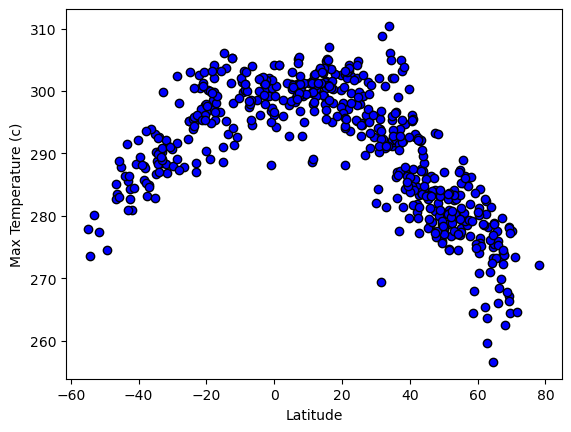

In [26]:
# Build scatter plot for latitude vs. temperature
Fig1 = plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], color="blue", edgecolor ="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (c)")

# Save the figure
#plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

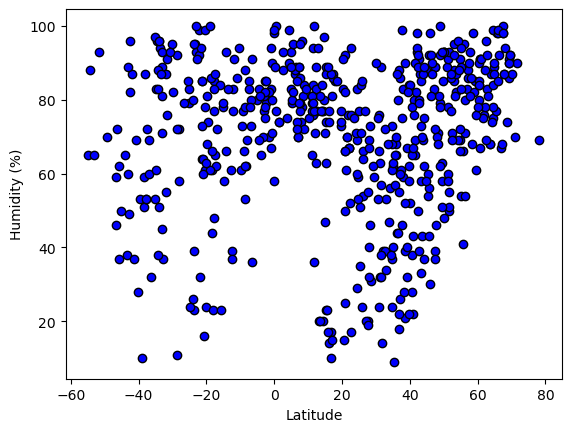

In [27]:
# Build the scatter plots for latitude vs. humidity
Fig1 = plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], color="blue", edgecolor ="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Save the figure
#plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

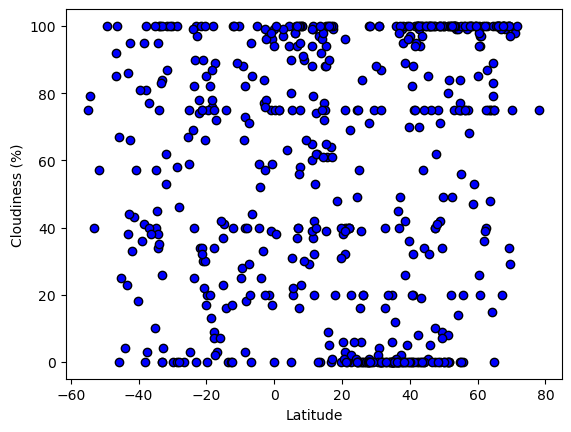

In [30]:
# Build the scatter plots for latitude vs. humidity
Fig1 = plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], color="blue", edgecolor ="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Save the figure
#plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

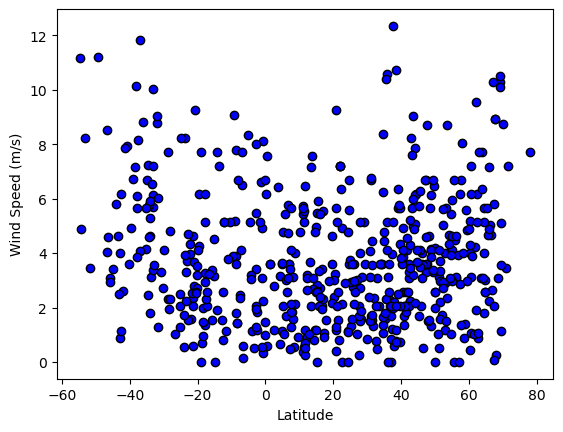

In [31]:
# Build the scatter plots for latitude vs. humidity
Fig1 = plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], color="blue", edgecolor ="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")

# Save the figure
#plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

In [40]:
# Define a function to create Linear Regression plots
def linear_regression(x,y):
    res=linregress(x,y)
    plt.scatter(x,y)
    plt.plot(x,res.intercept+res.slope*x)

In [36]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# norther_hemi_df = linear_regression()
northern_hemi = []
southern_hemi = []

for city in city_data:
    if city['Lat'] >= 0:
        northern_hemi.append(city)
    else:
        southern_hemi.append(city)
    
    
northern_hemi_df = pd.DataFrame(northern_hemi)


# Display sample data
northern_hemi_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,touros,-5.1989,-35.4608,298.61,80,100,8.34,BR,1697414031
1,auki,-8.7676,160.7034,303.28,66,66,1.78,SB,1697414034
2,edinburgh of the seven seas,-37.0676,-12.3116,284.92,69,77,11.85,SH,1697413935
3,blackmans bay,-43.0167,147.3167,285.66,60,38,0.89,AU,1697413941
4,moranbah,-22.0016,148.0466,300.42,32,34,1.57,AU,1697414039


In [37]:
southern_hemi_df = pd.DataFrame(southern_hemi)
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,touros,-5.1989,-35.4608,298.61,80,100,8.34,BR,1697414031
1,auki,-8.7676,160.7034,303.28,66,66,1.78,SB,1697414034
2,edinburgh of the seven seas,-37.0676,-12.3116,284.92,69,77,11.85,SH,1697413935
3,blackmans bay,-43.0167,147.3167,285.66,60,38,0.89,AU,1697413941
4,moranbah,-22.0016,148.0466,300.42,32,34,1.57,AU,1697414039


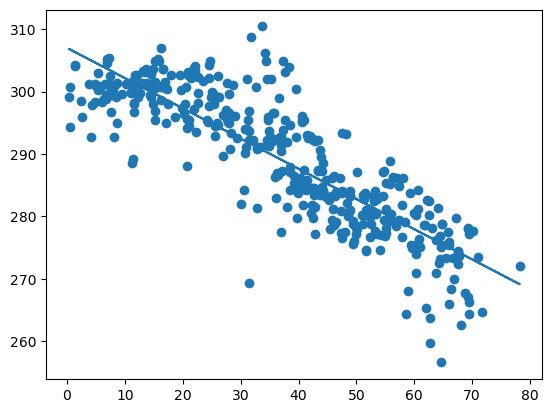

In [41]:
#Lat and max temp lin regression north

northern_temp_regress = linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'])

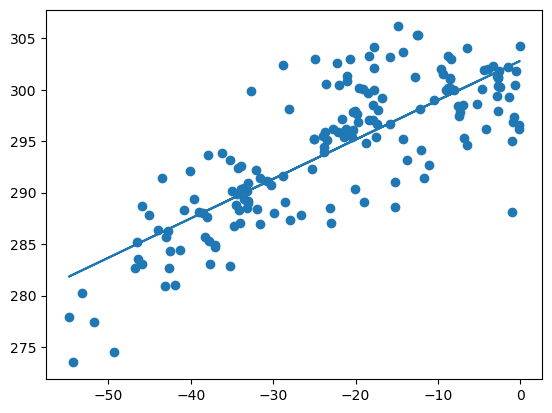

In [42]:
#Lat and max temp lin regression south

southern_temp_regress = linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'])

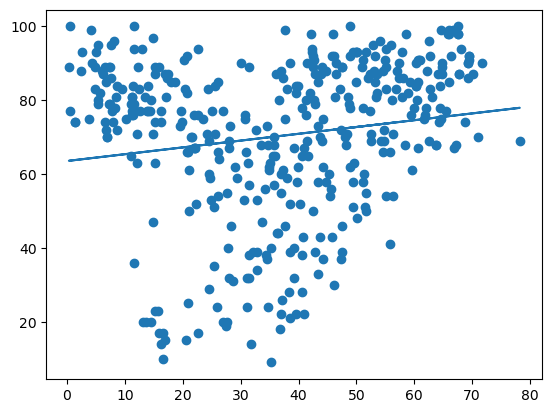

In [43]:
#Lat and max humidity lin regression north

northern_hum_regress = linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Humidity'])

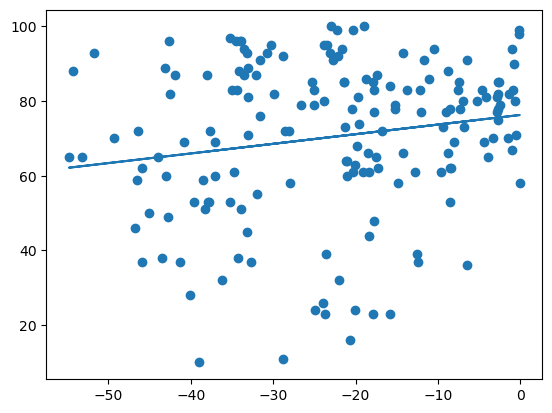

In [44]:
#Lat and max humidity lin regression south

southern_hum_regress = linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Humidity'])

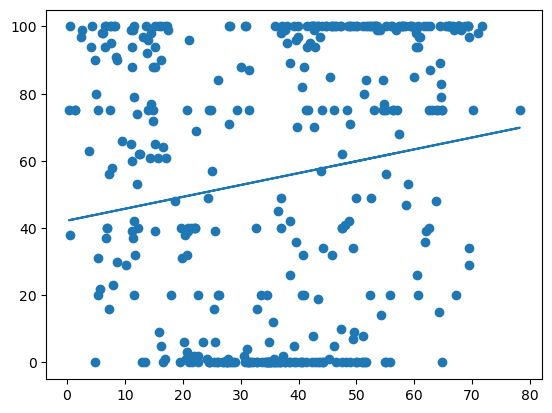

In [45]:
#Lat and max cloudiness lin regression north

northern_hum_regress = linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'])

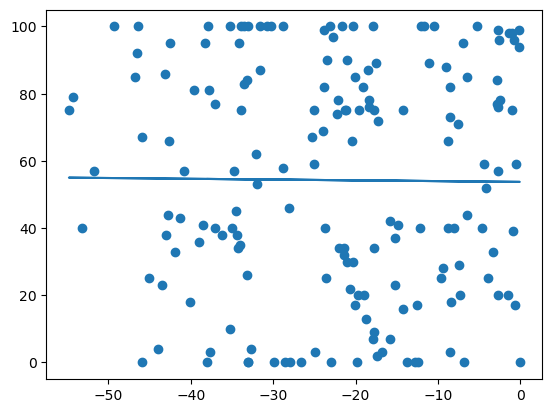

In [46]:
#Lat and max loudiness lin regression south

southern_hum_regress = linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'])